In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def display_lines(m, b, color='c--'):
    plt.xlim(-0.10,1.05)
    plt.ylim(-0.10,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [5]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')


In [2]:
PercepData = pd.read_csv('PerceptronData.csv', header = None)

In [3]:
PercepData.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [6]:
PercepData.shape

(100, 3)

In [7]:
X = np.array(PercepData.iloc[:, :-1].values).reshape(100,2)
Y = np.array(PercepData.iloc[:, -1].values).reshape(100,1)

In [19]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(53)


def stepFunction(t):
    if t >= 0:
        return 1
    return 0


def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])


# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        display_lines(-W[0]/W[1], -b/W[1])
    

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display_lines(-W[0]/W[1], -b/W[1], 'black')
    
    
    # Plotting the data
    plot_points(X, Y)
    plt.show()



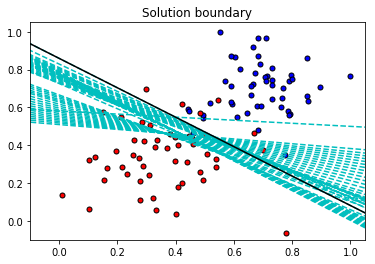

In [20]:
trainPerceptronAlgorithm(X,Y)